In [584]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [585]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [586]:
IMG_SIZE=28
batch_size=200

In [587]:
x_train = x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],IMG_SIZE,IMG_SIZE,1).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [588]:
train_gen = ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.1,
                               shear_range=0.3,
                               height_shift_range=0.1,
#                                zoom_range=[2.5, 0.75])
#                                 zoom_range=[2, 0.7])
                               zoom_range=[1.3, 0.6])
#                                zoom_range=-2)
#                                zoom_range=0.1)

In [589]:
training_set = train_gen.flow(x_train,y_train,batch_size=batch_size)
test_set = train_gen.flow(x_test,y_test,batch_size=batch_size)

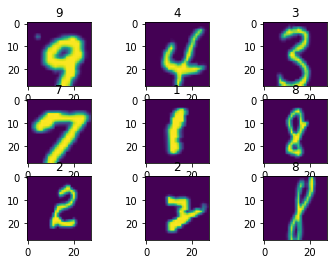

In [590]:
for i in range(9):
    img, lab = training_set.next()
    plt.subplot(3,3,i+1)
    plt.imshow(img[0])
    plt.title(np.argmax(lab[0]))